In [23]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as skp
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
# Using scikit learn Standard scaler for scaling our data and DB Scan function to make clusters of our required columns
def dbscan(data, eps, min_samples):
    new_data = data.copy()
    std_scaler = skp.StandardScaler()
    new_data = std_scaler.fit_transform(new_data) # Using Standard Scaler to scale our data
    db_scan = skc.DBSCAN(eps=eps, min_samples=min_samples) # Using DBSCAN to scan for clusters
    db_scan.fit(new_data)
    clusters = db_scan.fit_predict(new_data)
    return clusters

In [25]:
# To plot the scatter graph using different features on a 2D plane
def plot_graph(new_data):     
    plt.figure(figsize=(20, 15))
    plt.subplot(2, 2, 1)
    sb.scatterplot(x = 'child_mort', y = 'life_expec', data = new_data, hue = 'cluster', palette = "bright")
    plt.legend(loc = "best")
    plt.title('DBSCAN')
    plt.xlabel('Child Mortality')
    plt.ylabel('Life Expectancy')
    
    plt.subplot(2, 2, 2)
    sb.scatterplot(x = 'life_expec', y = 'total_fer', data = new_data, hue = 'cluster', palette = "bright")
    plt.legend(loc = "best")
    plt.title('DBSCAN')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Total fer')
    
    plt.subplot(2, 2, 3)
    sb.scatterplot(x = 'income', y = 'gdpp', data = new_data, hue = 'cluster', palette = "bright")
    plt.legend(loc = "best")
    plt.title('DBSCAN')
    plt.xlabel('Income')
    plt.ylabel('GDPP')
    
    plt.subplot(2, 2, 4)
    sb.scatterplot(x = 'total_fer', y = 'child_mort', data = new_data, hue = 'cluster', palette = "bright")
    plt.legend(loc = "best")
    plt.title('DBSCAN')
    plt.xlabel('Total fer')
    plt.ylabel('Child Mortality')
    
    plt.show()

<AxesSubplot:>

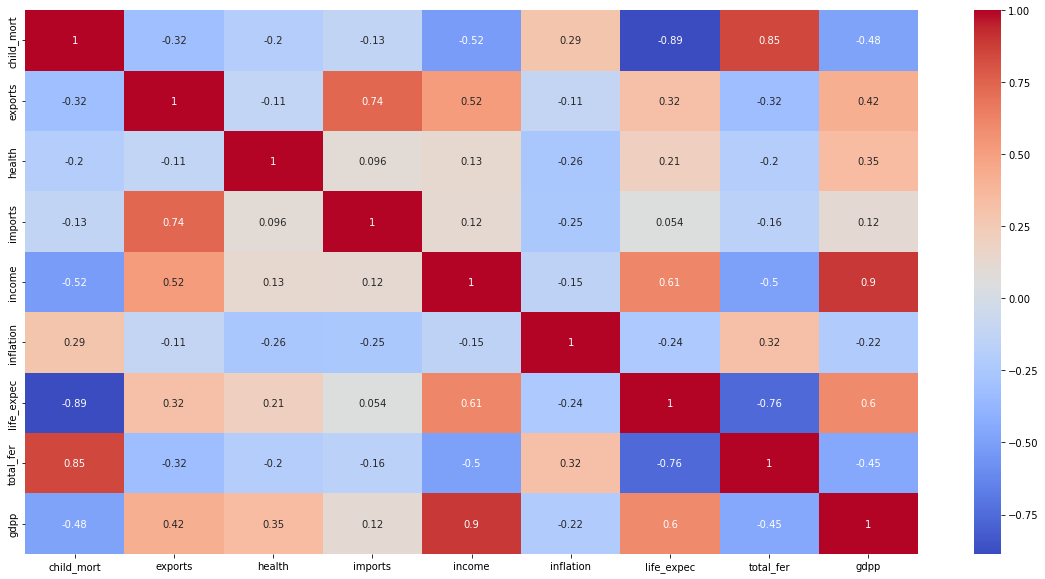

In [26]:
# Finding out the positive correlation of each feature with each other using heatmap and correlation
plt.figure(figsize=(20, 10))
sb.heatmap(data.corr(), annot = True, cmap = "coolwarm")

Cluster: [-1  0  1  2  3  4]
Clusters Size: [75 60 16  6  5  5]


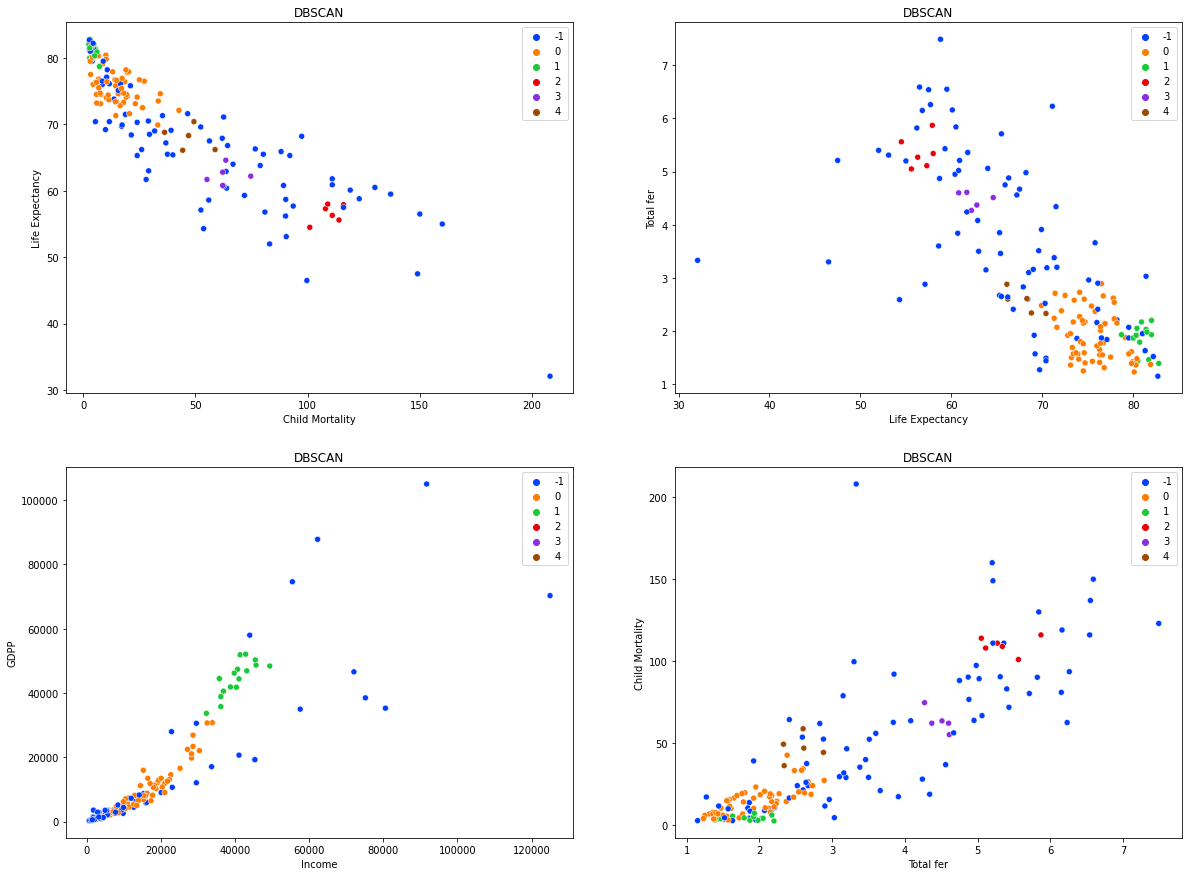

After deleting noise points :


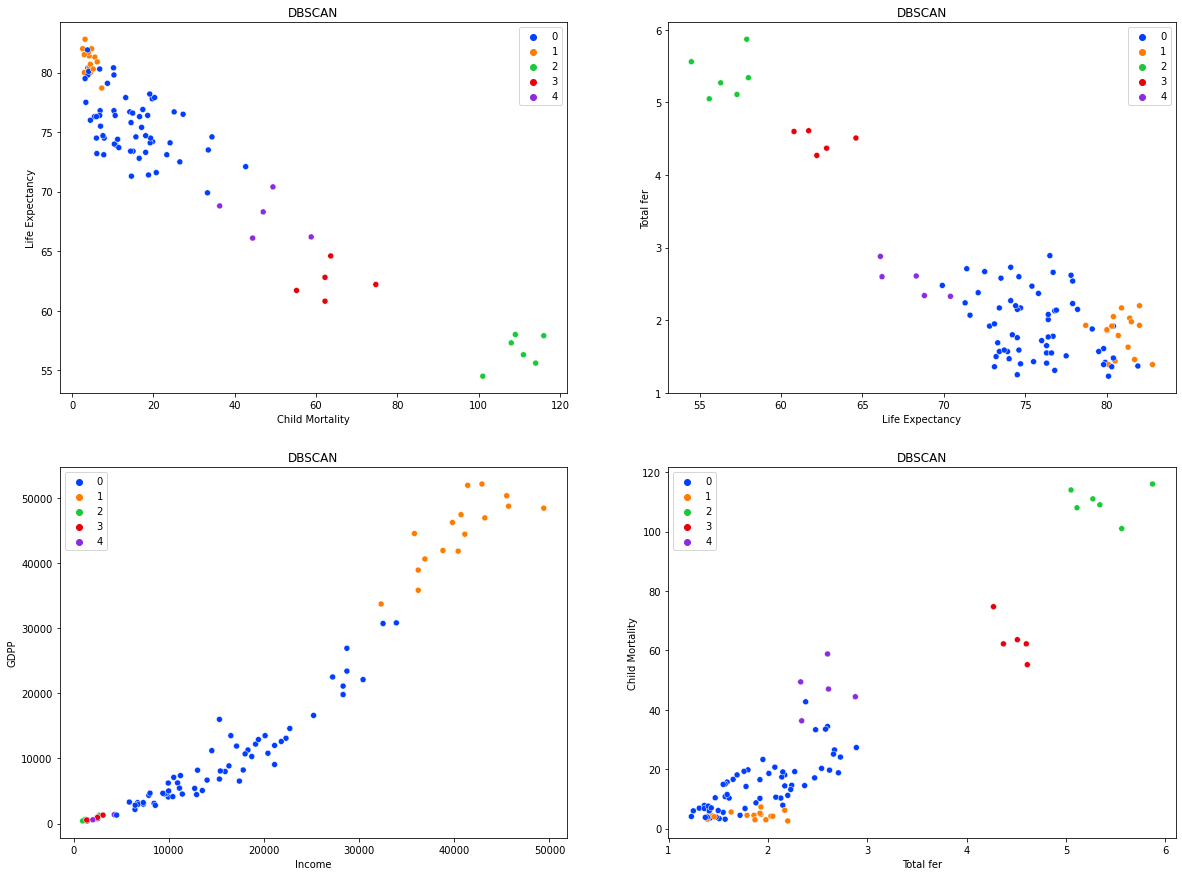

In [27]:
# As seen from the heatmap, We can define some top features with highest positive correlation score
new_data = data.loc[:,["income", "gdpp", "total_fer", "child_mort", "life_expec"]]

# Using E as 0.5 and number of minimum samples as 5
clusters = dbscan(new_data, 0.4, 5)
new_data['cluster'] = clusters
unique_clusters = np.unique(clusters)
print('Cluster:', unique_clusters)
print('Clusters Size:', np.bincount(clusters + 1))

# Before deleting noise points
plot_graph(new_data)

# Since we know all the data points with -1 cluster are noise points we can remove them if we want
deleted_data = new_data.drop(new_data[new_data.cluster == -1].index)

print ("After deleting noise points :")
plot_graph(deleted_data)

In [22]:
# Finding out which countries belong to which cluster
new_data['country'] = data['country']
for val in unique_clusters:
    countries = list(new_data.loc[new_data['cluster'] == val, 'country'])
    print ("Countries for cluster {}:\n{}\n".format(val, countries))

Countries for cluster -1:
['Afghanistan', 'Angola', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Belarus', 'Benin', 'Bolivia', 'Botswana', 'Brunei', 'Burundi', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Denmark', 'Egypt', 'Equatorial Guinea', 'Fiji', 'Gabon', 'Gambia', 'Guatemala', 'Guyana', 'Haiti', 'Iraq', 'Israel', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Libya', 'Luxembourg', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russia', 'Samoa', 'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Singapore', 'Solomon Islands', 'South Africa', 'Sudan', 'Suriname', 'Switzerland', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'Vanuatu', 'Yemen', 'Zambia']

Countries for cluster 0:
['Albania', 'Algeria', 'Antigua an